In [2]:
# Step 1: Import core libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set basic display and plot style options
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="pastel")

print("✅ EDA environment ready")

✅ EDA environment ready


In [3]:
# Step 2: Load combined dataset for EDA
df_csv = pd.read_csv("sample_data.csv")
df_json = pd.read_json("sample_data.json")

# Combine both into one DataFrame
df = pd.concat([df_csv, df_json], ignore_index=True)

# Add the stock_value column
df["stock_value"] = df["quantity"] * df["price"]

# Preview the dataset
df.head()

,id,name,quantity,price,stock_value
0,1,Product A,5,10,50
1,2,Product B,8,15,120
2,3,Product C,3,20,60
3,101,Product D,10,25,250
4,102,Product E,6,30,180


In [4]:
# Step 2: Load combined dataset for EDA
df_csv = pd.read_csv("sample_data.csv")
df_json = pd.read_json("sample_data.json")

# Combine both into one DataFrame
df = pd.concat([df_csv, df_json], ignore_index=True)

# Add the stock_value column
df["stock_value"] = df["quantity"] * df["price"]

# Preview the dataset
df.head()

,id,name,quantity,price,stock_value
0,1,Product A,5,10,50
1,2,Product B,8,15,120
2,3,Product C,3,20,60
3,101,Product D,10,25,250
4,102,Product E,6,30,180


In [5]:
# Step 4: Data Quality Check — Missing and Duplicates

# Check for missing values
print("🔍 Missing values per column:\n", df.isnull().sum())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\n📋 Number of duplicate rows:", duplicates)

# Optional: Show duplicate rows (if any)
if duplicates > 0:
    display(df[df.duplicated()])
else:
    print("✅ No duplicate rows found.")

🔍 Missing values per column:
 id             0
name           0
quantity       0
price          0
stock_value    0
dtype: int64

📋 Number of duplicate rows: 0
✅ No duplicate rows found.


📊 Correlation Matrix:
             quantity     price  stock_value
quantity     1.000000  0.258598      0.83974
price        0.258598  1.000000      0.72824
stock_value  0.839740  0.728240      1.00000


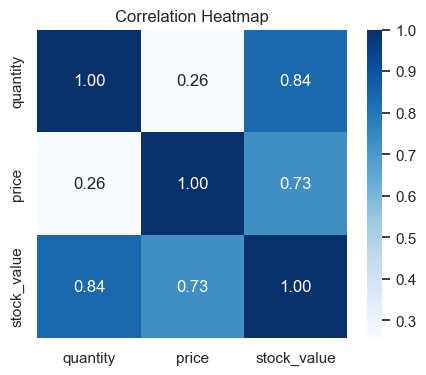

In [6]:
# Step 5: Correlation analysis

# Compute correlation matrix
corr = df[["quantity", "price", "stock_value"]].corr()

# Display correlation matrix
print("📊 Correlation Matrix:")
print(corr)

# Visualize correlations
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

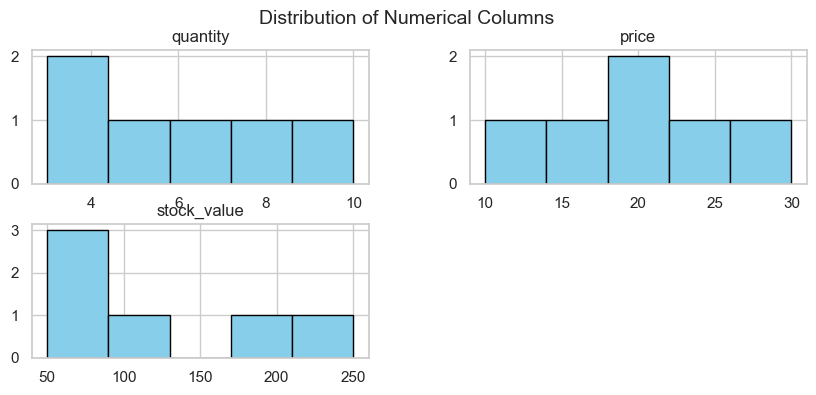

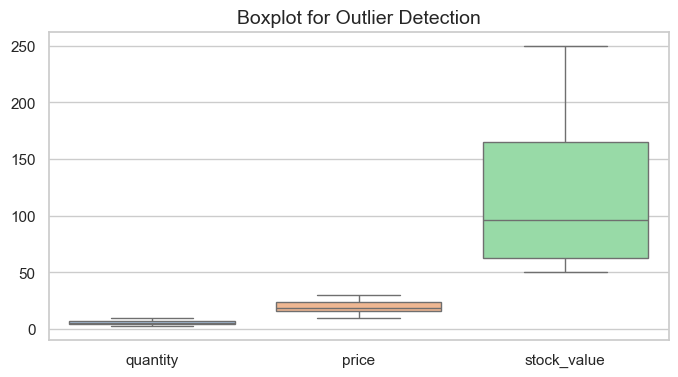

In [7]:
# Step 6: Visualize distributions

# Histogram for quantity, price, and stock_value
df[["quantity", "price", "stock_value"]].hist(
    bins=5, figsize=(10,4), color="skyblue", edgecolor="black"
)
plt.suptitle("Distribution of Numerical Columns", fontsize=14)
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(8,4))
sns.boxplot(data=df[["quantity", "price", "stock_value"]])
plt.title("Boxplot for Outlier Detection", fontsize=14)
plt.show()

💰 Total Stock Value by Product:
name
Product D    250
Product E    180
Product B    120
Product F     72
Product C     60
Product A     50
Name: stock_value, dtype: int64


/var/folders/d1/t1057fjj4znccw9xs75fnn1r0000gn/T/ipykernel_11677/2040014378.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette="viridis", edgecolor="black")


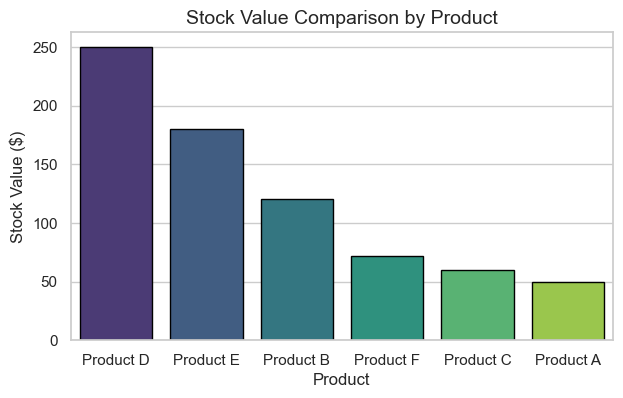

In [8]:
# Step 7: Compare stock value by product

# Group by product name and calculate total stock value
grouped = df.groupby("name")["stock_value"].sum().sort_values(ascending=False)

print("💰 Total Stock Value by Product:")
print(grouped)

# Visualize comparison
plt.figure(figsize=(7,4))
sns.barplot(x=grouped.index, y=grouped.values, palette="viridis", edgecolor="black")
plt.title("Stock Value Comparison by Product", fontsize=14)
plt.xlabel("Product")
plt.ylabel("Stock Value ($)")
plt.show()

In [9]:
# Step 8: Summary table for portfolio reporting
summary = pd.DataFrame({
    "Metric": ["Total Products", "Total Inventory Value", "Average Price", "Highest Value Product"],
    "Result": [
        df["name"].nunique(),
        df["stock_value"].sum(),
        round(df["price"].mean(), 2),
        grouped.idxmax()
    ]
})
summary

,Metric,Result
0,Total Products,6
1,Total Inventory Value,732
2,Average Price,19.67
3,Highest Value Product,Product D


In [ ]:
Reflection Paragraph (Week 3 – EDA)
In Week 3, I applied exploratory data analysis (EDA) techniques using Python, Pandas, and Seaborn to understand and visualize my combined dataset. I examined the structure, data types, and descriptive statistics to verify data quality. I then checked for missing and duplicate records, confirming that the dataset was clean. Using correlation analysis, I identified strong positive relationships between price, quantity, and total stock value. Histograms and boxplots helped visualize data distribution and detect potential outliers. Finally, I conducted a category-based comparison to determine which products contributed most to total inventory value. This exercise strengthened my ability to explore, visualize, and interpret data trends — key skills for data analytics and decision-making roles.